## The HAM10000 Dataset
The HAM10000 dataset is used for training the model. This dataset is a collection of around 10,000 labelled images of 7 different types of skin lesions.

These are the types of lesions that are found in the dataset:

* Actinic Keratoses
* Basal Cell Carcinoma
* Benign Keratosis
* Dermatofibroma
* Malignant Melanoma
* Melanocytic Nevi
* Vascular Lesions

### You can find out this dataset [here](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000)

In [1]:
# importing libraries necessary for this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

%matplotlib inline

print(os.listdir("lesions detection"))

['.ipynb_checkpoints', 'HAM10000_images_part_1', 'HAM10000_images_part_2', 'HAM10000_metadata.csv', 'sample_image.jpg']


In [2]:
# merging images from given two image folders into a dictionary
location = 'lesions detection'
image_paths = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(location, '*', '*.jpg'))}

# Data Preparation

In [3]:
df = pd.read_csv('lesions detection/HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
# adding columns to dataframe that will be helpful during this project
df['path'] = df['image_id'].map(image_paths.get)

lesion_types = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['type'] = df['dx'].map(lesion_types.get)

# Converting the type to the categorical values
df['type_id'] = pd.Categorical(df['type']).codes

df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,type,type_id
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,lesions detection\HAM10000_images_part_2\ISIC_...,Benign keratosis-like lesions,2
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2


# Image Processing

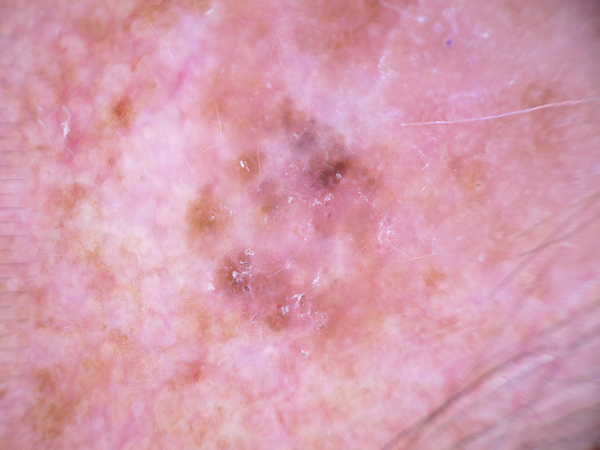

In [5]:
Image.open(df['path'][2])

In [6]:
# converting images into array and resize them
df['image_array'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((150,150))))

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,type,type_id,image_array
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2,"[[[189, 153, 191], [192, 155, 198], [193, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2,"[[[26, 15, 23], [26, 15, 23], [26, 14, 24], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2,"[[[186, 124, 135], [191, 135, 144], [195, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,lesions detection\HAM10000_images_part_1\ISIC_...,Benign keratosis-like lesions,2,"[[[23, 11, 15], [23, 10, 19], [29, 13, 23], [3..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,lesions detection\HAM10000_images_part_2\ISIC_...,Benign keratosis-like lesions,2,"[[[129, 87, 109], [140, 92, 116], [147, 103, 1..."


D:\anaconda\envs\TensorFlowGPU\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 10000 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


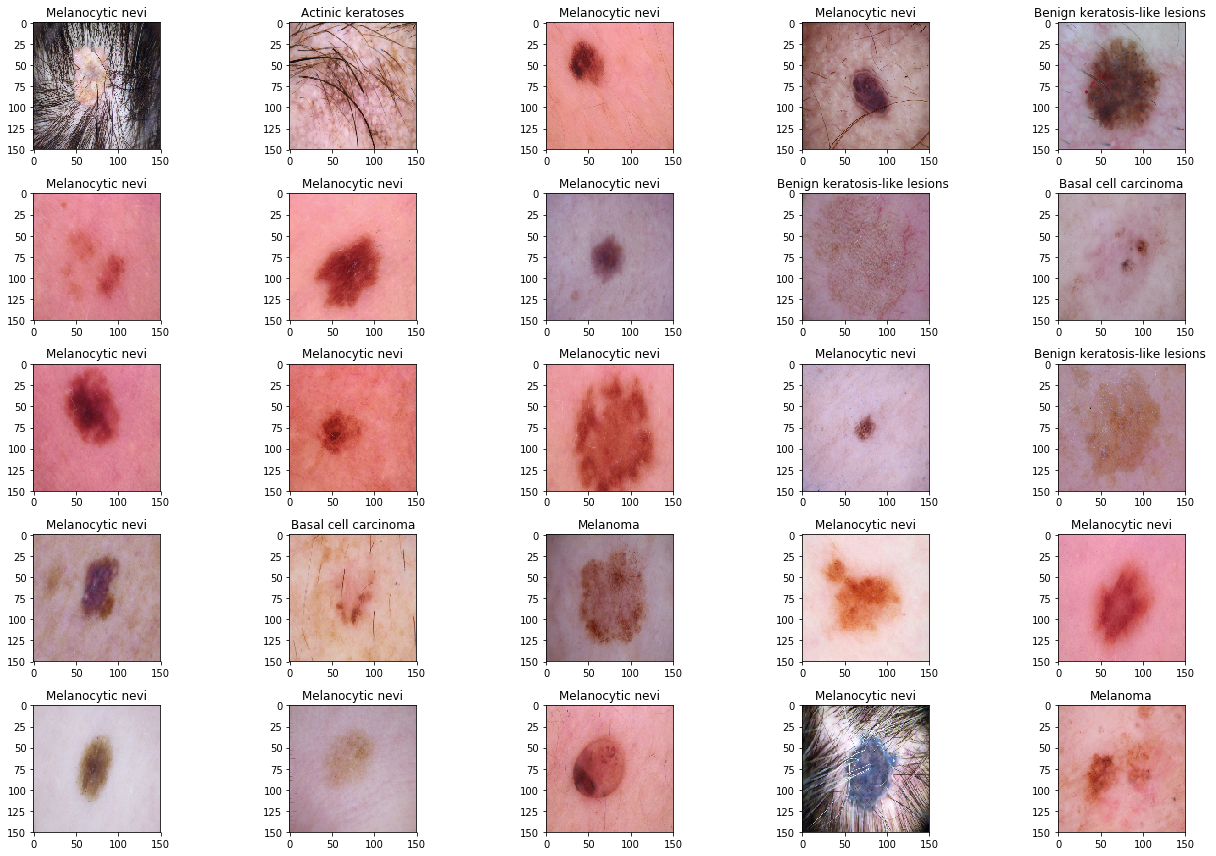

In [7]:
#randomly plot images with their titles
plt.figure(figsize= (18,12))
for i,img in enumerate(np.random.random_integers(0, 10000, 25)):
    plt.subplot(5,5,i+1)
    plt.imshow(df['image_array'][img])
    plt.title(df['type'][img])
plt.tight_layout()
plt.show()

# Data Preprocessing and Visualization 

In [8]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
type             0
type_id          0
image_array      0
dtype: int64

In [9]:
#dropping all the rows which contains NAN values
df = df.dropna()

In [10]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
type            0
type_id         0
image_array     0
dtype: int64

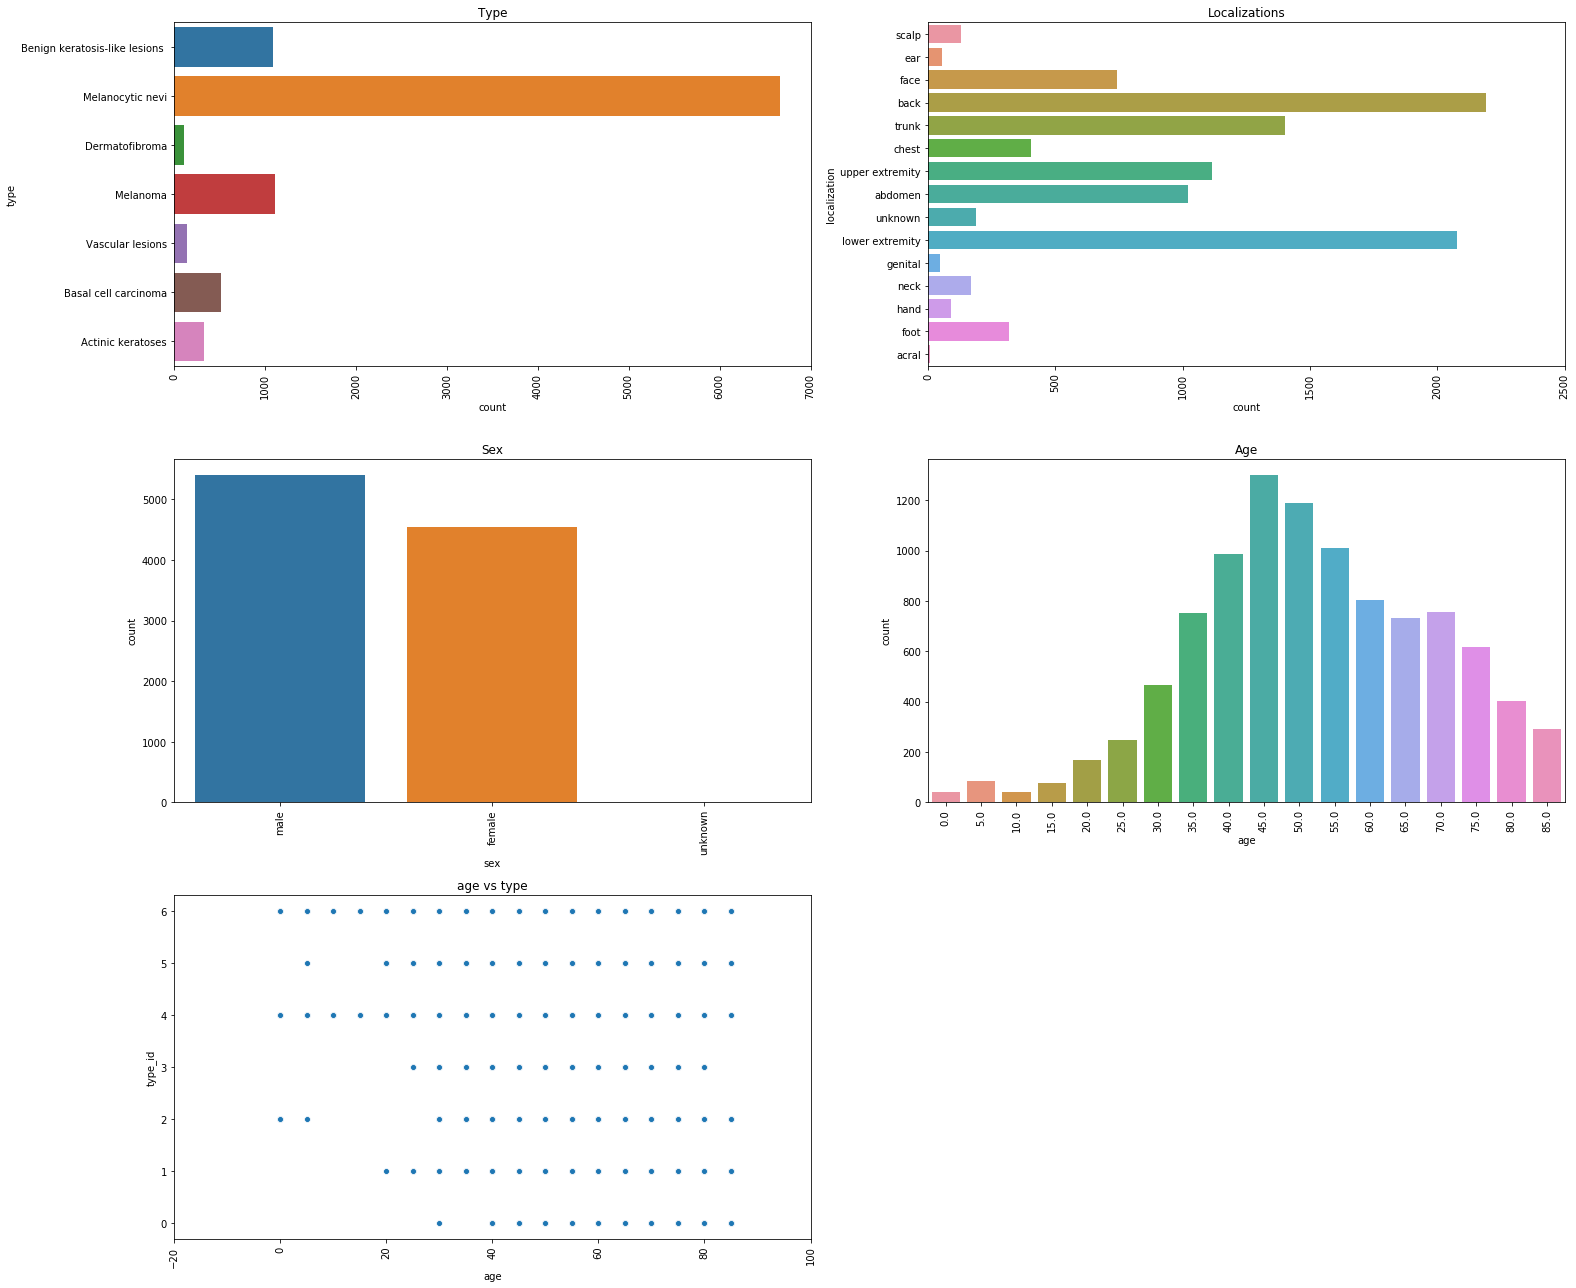

In [11]:
import seaborn as sns

plt.figure(figsize = (22,18))

plt.subplot(3,2,1)
fig = sns.countplot(y = 'type', data = df)
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('Type')

plt.subplot(3,2,2)
fig = sns.countplot(y = 'localization', data = df)
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('Localizations')

plt.subplot(3,2,3)
fig = sns.countplot(x = 'sex', data = df)
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('Sex')

plt.subplot(3,2,4)
fig = sns.countplot(x = 'age', data = df)
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('Age')

plt.subplot(3,2,5)
fig = sns.scatterplot(x = 'age', y = 'type_id', data=df)
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('age vs type')

plt.tight_layout()
plt.show()

## Observations:

* Plot 1: It can be seen that type Melanocytic Nevi is most common type of lesion that is found in humans.
* Plot 2: This plot shows us that back, lower extemity and trunk are most frequent localizations on the body that contains lesions.
* Plot 3: This plot shows us that males are more prone to lesions as compared to female.
* Plot 4: This plot shows us that humans having age between 40 to 60 are more prone to lesions.
* Plot 5: It seems that skin lesions types Melanocytic nevi, Dermatofibroma, Basal cell carcinoma and Vascular lesions are not much common below the age of 20.

In [12]:
features = df.drop(columns=['type_id'],axis=1)
target = df['type_id']

In [13]:
#Shuffle and split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7966, 10), (1992, 10), (7966,), (1992,))

In [15]:
#Normalization
X_train = np.asarray(X_train['image_array'].tolist())
X_test = np.asarray(X_test['image_array'].tolist())

X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

In [16]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes= 7)
y_test = to_categorical(y_test, num_classes= 7)

Using TensorFlow backend.


In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7966, 150, 150, 3), (1992, 150, 150, 3), (7966, 7), (1992, 7))

In [18]:
#importing the model
from keras.models import Sequential

#creating model object
model=Sequential()

In [19]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

#adding layers and forming the model
model.add(Conv2D(32,(3,3),strides=1,padding="Same",activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,(3,3),strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,(3,3),strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(rate = 0.4))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(rate = 0.5))
model.add(Dense(7,activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
#compiling
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#training the model
model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 7966 samples, validate on 1992 samples
Epoch 1/10
7966/7966 [==============================] - 74s 9ms/step - loss: 1.0574 - acc: 0.6603 - val_loss: 0.8673 - val_acc: 0.6707
Epoch 2/10
7966/7966 [==============================] - 19s 2ms/step - loss: 0.8876 - acc: 0.6702 - val_loss: 0.8355 - val_acc: 0.6732
Epoch 3/10
7966/7966 [==============================] - 20s 3ms/step - loss: 0.8251 - acc: 0.6837 - val_loss: 0.7958 - val_acc: 0.6883
Epoch 4/10
7966/7966 [==============================] - 19s 2ms/step - loss: 0.7745 - acc: 0.7101 - val_loss: 0.7554 - val_acc: 0.7214
Epoch 5/10
7966/7966 [==============================] - 19s 2ms/step - loss: 0.7297 - acc: 0.7341 - val_loss: 0.7357 - val_acc: 0.7354
Epoch 6/10
7966/7966 [==============================] - 19s 2ms/step - loss: 0.6772 - acc: 0.7508 - val_loss: 0.7351 - val_acc: 0.7259
Epoch 7/10
7966/7966 [==============================] - 19s 2ms/step - loss: 0.6520 - acc: 0.7

In [21]:
#model train and test scores
model.evaluate(X_train,y_train),model.evaluate(X_test,y_test)

1992/1992 [==============================] - 2s 1ms/step


([0.4329032787434456, 0.8414511673719237],
 [0.7209158039476019, 0.7474899598393574])

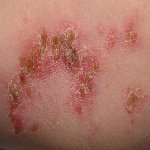

In [22]:
# predicting a sample image
Image.open("lesions detection/sample_image.jpg").resize((150,150))

In [23]:
test_image = Image.open("lesions detection/sample_image.jpg").resize((150,150))
test_image = np.asarray(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)

[[0. 0. 0. 0. 1. 0. 0.]]


In [24]:
model.save('Skin-Lesions-Detection.h5')